### 解微分方程 | Solving a differential equation

常微分方程（ordinary differential equation，ODE）：
$$
\frac{\partial f}{\partial x} = - \frac{f(x)}{x}
$$
- $f$ takes only one input $x$

> Solving an ODE means finding a function $f$ which satisfies the differential equation.

Solution: $f(x) = \frac{C}{x}$

To find a particular solution, additional constraints are needed, such as imposing the solution to go through a predefined point.<br>
Such constraints are called **initial conditions**.

Example: If set the initial condition to be $(x_0, y_0) = (2, 1)$, then this implies that $C = 2$ and the particular solution is $f(x) = \frac{2}{x}$



#### 三种方法解微分方程 | Three main approaches to solve a differential equation

1. 求解析解 | Finding an analytical solution （困难，通常不存在）
2. 寻找解析近似解 | Looking for an analytical approximation （非常困难，近似误差难以评估）
3. 计算数值近似解 | Compute a numerical approximation （适用于任何微分方程，易于实现和分析）


---

## 1. 有限差分 | Finite difference


### 前向差分格式 | Forward-difference scheme

By approximating the first-order derivative $\frac{\partial f}{\partial x}$ by the forward-difference approximation $\frac{f(x + \Delta_x) - f(x)}{\Delta_x}$ with constant mesh size $0 < \Delta_x \ll |x|$, we can approximate the differential equation by

$$
\frac{\partial f}{\partial x} = -\frac{f(x)}{x} \quad \implies \quad \frac{f(x + \Delta_x) - f(x)}{\Delta_x} = -\frac{f(x)}{x}
$$
From where we get: “步进公式”
$$
f(x + \Delta_x) = f(x)\left( 1 - \frac{\Delta_x}{x} \right)
$$

> 如果你知道当前点 $x$ 的解 $f(x)$，你就可以估算出在下一个点 $x + Δx$ 的解 $f(x + Δx)$ 应该是多少。

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

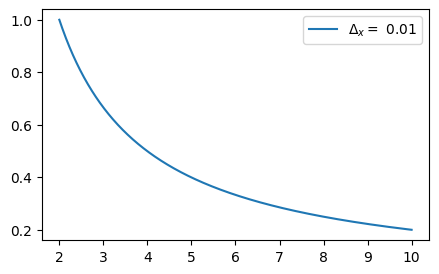

In [42]:
def FORWARD_NUMERICAL():
    x0, xN = 2.0, 10.0
    N = 801

    x = np.linspace(x0, xN, N)

    dx = x[1] - x[0]                    # 步长 Δx = 0.01
    fx = np.zeros_like(x)
    fx[0] = 1.0                         # 初始条件: f(2.0) = 1.0

    for (i, xi) in enumerate(x[:-1]):   # 前向迭代计算
        fx[i + 1] = fx[i] * (1.0 - dx / xi)

    plt.figure(figsize = (5, 3))
    sns.lineplot(x = x, y = fx, label = f"$\\Delta_x = $ {dx.round(2)}")    # 这条折线，就是我们追求的微分方程数值解的图像。

FORWARD_NUMERICAL()

> 使用前向欧拉方法数值求解了一个一阶线性微分方程，通过离散化将连续的微分问题转化为离散的代数递推问题，最终获得了在区间 $[2, 10]$ 上的数值解。<br>

获得微分方程 $\frac{\partial f}{\partial x} = -\frac{f(x)}{x}$ 在区间 $[2, 10]$ 上，满足初始条件 $f(2) = 1$ 的解函数 f(x) 的图像。

- 对于数值方法，“解”不是一个公式，而是解曲线上一系列离散的数据点。

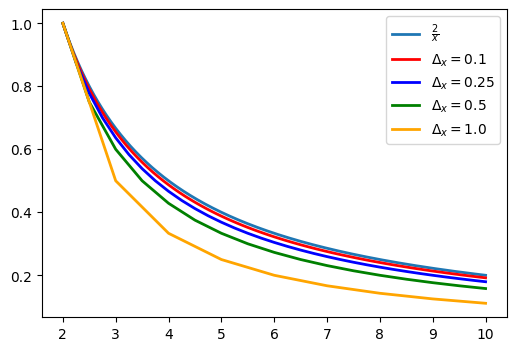

In [50]:
def FORWARD_NUMERICAL_MULTIPLE_MESH():
    x0, xN = 2.0, 10.0

    plt.figure(figsize = (6, 4))

    # 解析解
    x_analytical = np.linspace(x0, xN, 1000)
    f_analytical = 2.0 / x_analytical
    sns.lineplot(x = x_analytical, y = f_analytical, linewidth = 2, label = "$\\frac{2}{x}$")

    # 数值解
    step_sizes = [0.10, 0.25, 0.50, 1.00]
    colors = ["red", "blue", "green", "orange"]

    for step_size, color in zip(step_sizes, colors):

        N = int((xN - x0) / step_size) + 1
        x = np.linspace(x0, xN, N)
        dx = x[1] - x[0]

        fx = np.zeros_like(x)
        fx[0] = 1.0

        for (i, xi) in enumerate(x[:-1]):
            fx[i + 1] = fx[i] * (1 - dx / xi)

        sns.lineplot(x = x, y = fx, color = color, linewidth = 2, label = f"$\\Delta_x = ${step_size}")

FORWARD_NUMERICAL_MULTIPLE_MESH()

这里需要注意的是，也不是说步长越小越好，小到一定程度就会有不可忽略的浮点误差。

On the one hand, the smaller the mesh size $\Delta_x$, the closer the approximation to the true solution.
- This is because the trunction error of the approximation of the first-order derivative is proportional to $\Delta_x$

On the other hand, the float-rounding error cannot be neglected for small values of $\Delta_x$, which deteriorates the approximation.

> The smaller the mesh size, the more grid points and the higher the computational cost.

---

### 中心差分格式 | Centered-difference scheme

$$
\frac{\partial f}{\partial x}=-\frac{f(x)}{x} \quad \implies \quad \frac{f(x+\Delta_x)-f(x-\Delta_x)}{2\Delta_x}=-\frac{f(x)}{x}
$$
which can be rewritten as:
$$
f(x)=\frac{x}{2\Delta_x}\left(f(x-\Delta_x)-f(x+\Delta_x)\right)
$$

In order to compute the equation, one needs to know two points,
- $f(x - \Delta_x)$
- $f(x + \Delta_x)$

> Two initial conditions.

---

For $4$ successive approximation points
$$
(x_i, y_i)
$$
where $x_i = x_0 + i\times \Delta_x$, $y_i = f(x_i)$, $i = 1, 2, 3, 4$

The finite-difference equation $y_i=\frac{x_i}{2\Delta_x}\left(y_{i-1}-y_{i+1}\right)$ yields:
$$
\begin{gathered}
y_1 = \frac{1}{2\Delta_x}x_1(y_0-y_2) \\
y_2 = \frac{1}{2\Delta_x}x_2(y_1-y_3) \\
y_3 = \frac{1}{2\Delta_x}x_3(y_2-y_4) \\
y_4 = \frac{1}{2\Delta_x}x_4(y_3-y_5)
\end{gathered}
$$

Rewrite it as the following linear system:

$$
\begin{bmatrix}
1 & c_{1} \\
-c_{2} & 1 & c_{2} \\
& -c_{3} & 1 & c_{3} \\
& & -c_{4} & 1
\end{bmatrix}
\begin{bmatrix}
y_{1} \\
y_{2} \\
y_{3} \\
y_{4}
\end{bmatrix} = 
\begin{bmatrix}
c_{1}y_{0} \\ 
0 \\
0 \\
-c_{4}y_{5}
\end{bmatrix}
$$
where $c_i = \frac{x_i}{2\Delta_x}$

> This can be solve if we know the two intial conditions $y_0$ and $y_5$.
